Plots for population level time constants:
1. Three methods like on Fig.2 in the paper
2. with confidence intervals

In [121]:
import pandas as pd
import numpy as np
import json
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from calculate_tau import fit_single_exp, fit_single_exp_2d, func_single_exp_monkey
from cfg_global import project_folder_path
os.chdir(current_wd)

In [57]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
empty_suffix = 'no'

In [3]:
results_folder = project_folder_path + 'results\\monkey\\'
fig_folder = results_folder + '\\fig_drafts_paper_reduce\\'
results_folder_current = project_folder_path + 'results\\monkey\\fixation_period_1000ms_' + empty_suffix + '_empty\\'

### Get the data

In [4]:
pfdl_dataset_constraints_df = pd.read_pickle(results_folder + 'pfdl_dataset_constraints_1000ms_' + empty_suffix + '_empty_df.pkl')
pfp_dataset_constraints_df = pd.read_pickle(results_folder + 'pfp_dataset_constraints_1000ms_' + empty_suffix + '_empty_df.pkl')
# get subsets based on constraints 
pfdl_dataset_constraints_subset_df = pfdl_dataset_constraints_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1').copy()
pfp_dataset_constraints_subset_df = pfp_dataset_constraints_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1').copy()

#temp_folder = project_folder_path + 'results\\monkey\\lab_meeting_snapshot\\fixation_period_1000ms\\'
#pfdl_dataset_constraints_subset_df = pd.read_pickle(temp_folder + 'binned\\pfdl\\acf\\z\\' + 'acf_average_trial_pearsonr_constrained_input_50ms_20lags_df.pkl')
#pfp_dataset_constraints_subset_df = pd.read_pickle(temp_folder + 'binned\\pfp\\acf\\z\\' + 'acf_average_trial_pearsonr_constrained_input_50ms_20lags_df.pkl')

#pfdl_dataset_constraints_subset_df = pfdl_dataset_constraints_subset_df[['unit_id']].copy()
#pfp_dataset_constraints_subset_df = pfp_dataset_constraints_subset_df[['unit_id']].copy()

In [5]:
### pearsonr trial avg
pfdl_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder_current + 'binned\\pfdl\\acf\\' 
                                                    + 'acf_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_acf_average_trial_pearsonr_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfdl_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

pfp_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder_current + 'binned\\pfp\\acf\\' 
                                                   + 'acf_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_acf_average_trial_pearsonr_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfp_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

### sttc trial avg
pfdl_acf_average_trial_sttc_df = pd.read_pickle(results_folder_current + 'non_binned\\pfdl\\acf\\' 
                                                + 'acf_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_acf_average_trial_sttc_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfdl_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

pfp_acf_average_trial_sttc_df = pd.read_pickle(results_folder_current + 'non_binned\\pfp\\acf\\' 
                                               + 'acf_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_acf_average_trial_sttc_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfp_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

### sttc trial concat
pfdl_sttc_trial_concat_df = pd.read_pickle(results_folder_current + 'non_binned\\pfdl\\acf\\' 
                                                + 'acf_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_sttc_trial_concat_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_sttc_trial_concat_df, 
                                                                              on='unit_id', how='left')
pfdl_sttc_trial_concat_subset_df.reset_index(inplace=True, drop=True)

pfp_sttc_trial_concat_df = pd.read_pickle(results_folder_current + 'non_binned\\pfp\\acf\\' 
                                               + 'acf_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_sttc_trial_concat_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_sttc_trial_concat_df, 
                                                                              on='unit_id', how='left')
pfp_sttc_trial_concat_subset_df.reset_index(inplace=True, drop=True)

# check NaNs and number of units

print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_pearsonr_subset_df), 
                                                          len(pfp_acf_average_trial_pearsonr_subset_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_sttc_subset_df), 
                                                          len(pfp_acf_average_trial_sttc_subset_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_sttc_trial_concat_subset_df), 
                                                          len(pfp_sttc_trial_concat_subset_df)))

print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_pearsonr_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_pearsonr_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfdl_sttc_trial_concat_subset_df.isnull().any().any()))

print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_sttc_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_sttc_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_sttc_trial_concat_subset_df.isnull().any().any()))

N neurons in PFdl 380 
N neurons in PFp 328
N neurons in PFdl 380 
N neurons in PFp 328
N neurons in PFdl 380 
N neurons in PFp 328
NaNs in PFdl acf False
NaNs in PFp acf False
NaNs in PFp acf False
NaNs in PFdl acf False
NaNs in PFp acf False
NaNs in PFp acf False


In [6]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags)]

pfdl_acf_2d = pfdl_acf_average_trial_pearsonr_subset_df[acf_cols].values
pfp_acf_2d = pfp_acf_average_trial_pearsonr_subset_df[acf_cols].values

pfdl_acf_mean = np.nanmean(pfdl_acf_2d, axis=0)
pfdl_acf_sem = stats.sem(pfdl_acf_2d, axis=0)
pfp_acf_mean = np.nanmean(pfp_acf_2d, axis=0)
pfp_acf_sem = stats.sem(pfp_acf_2d, axis=0)

pfdl_acf_sttc_2d = pfdl_acf_average_trial_sttc_subset_df[acf_cols].values
pfp_acf_sttc_2d = pfp_acf_average_trial_sttc_subset_df[acf_cols].values

pfdl_acf_sttc_mean = np.nanmean(pfdl_acf_sttc_2d, axis=0)
pfdl_acf_sttc_sem = stats.sem(pfdl_acf_sttc_2d, axis=0)
pfp_acf_sttc_mean = np.nanmean(pfp_acf_sttc_2d, axis=0)
pfp_acf_sttc_sem = stats.sem(pfp_acf_sttc_2d, axis=0)

pfdl_acf_sttc_concat_2d = pfdl_sttc_trial_concat_subset_df[acf_cols].values
pfp_acf_sttc_concat_2d = pfp_sttc_trial_concat_subset_df[acf_cols].values

pfdl_acf_sttc_concat_mean = np.nanmean(pfdl_acf_sttc_concat_2d, axis=0)
pfdl_acf_sttc_concat_sem = stats.sem(pfdl_acf_sttc_concat_2d, axis=0)
pfp_acf_sttc_concat_mean = np.nanmean(pfp_acf_sttc_concat_2d, axis=0)
pfp_acf_sttc_concat_sem = stats.sem(pfp_acf_sttc_concat_2d, axis=0)

### Calculate tau

In [7]:
def get_population_tau(acf_mean_, start_idx_, exp_fun_):
    fit_popt, fit_pcov, tau, fit_r_squared, log_message = fit_single_exp(acf_mean_, start_idx_=start_idx_, exp_fun_=exp_fun_)
    
    # get confidence interval
    b_std_err = np.sqrt(fit_pcov[1, 1])  # Standard error of b
    tau_std_err = b_std_err / (fit_popt[1] ** 2)
    
    confidence_level = 0.95
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # 1.96 for 95% 
    
    tau_lower = tau - z_score * tau_std_err
    tau_upper = tau + z_score * tau_std_err

    print(f'tau {tau}, 95% CI {tau_lower},{tau_upper}, r_squared {fit_r_squared}, log message {log_message}')
    
    return tau, tau_lower, tau_upper, fit_r_squared, fit_popt

In [8]:
def get_population_tau_2d(acf_2d_, start_idx_, exp_fun_):    
    fit_popt, fit_pcov, tau, fit_r_squared, log_message = fit_single_exp_2d(acf_2d_, start_idx_=start_idx_, exp_fun_=exp_fun_)
    
    # get confidence interval
    b_std_err = np.sqrt(fit_pcov[1, 1])  # Standard error of b
    tau_std_err = b_std_err / (fit_popt[1] ** 2)
    
    confidence_level = 0.95
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # 1.96 for 95% 
    
    tau_lower = tau - z_score * tau_std_err
    tau_upper = tau + z_score * tau_std_err

    print(f'tau {tau}, 95% CI {tau_lower},{tau_upper}, r_squared {fit_r_squared}, log message {log_message}')
    
    return tau, tau_lower, tau_upper, fit_r_squared, fit_popt

In [9]:
population_level_dict = {}
population_level_dict_2d = {}

In [10]:
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfdl_acf_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['pearsonr_trial_avg_pfdl'] = {'tau_ms':tau*50,
                                                    'tau_lower_ms':tau_lower*50, 
                                                    'tau_upper_ms':tau_upper*50, 
                                                    'fit_r_squared': fit_r_squared, 
                                                    'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfp_acf_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['pearsonr_trial_avg_pfp'] = {'tau_ms':tau*50,
                                                    'tau_lower_ms':tau_lower*50, 
                                                    'tau_upper_ms':tau_upper*50, 
                                                    'fit_r_squared': fit_r_squared, 
                                                    'popt': popt}

tau 4.788860028880987, 95% CI 4.460481853152883,5.117238204609091, r_squared 0.9975695479799994, log message ok
tau 239.44300144404934, 95% CI 223.02409265764416,255.86191023045455
tau 4.578237053890829, 95% CI 4.106384457304803,5.050089650476855, r_squared 0.9942642309005556, log message ok
tau 228.91185269454147, 95% CI 205.31922286524016,252.50448252384277


In [11]:
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau_2d(pfdl_acf_2d, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict_2d['pearsonr_trial_avg_pfdl'] = {'tau_ms':tau*50,
                                                    'tau_lower_ms':tau_lower*50, 
                                                    'tau_upper_ms':tau_upper*50, 
                                                    'fit_r_squared': fit_r_squared, 
                                                    'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau_2d(pfp_acf_2d, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict_2d['pearsonr_trial_avg_pfp'] = {'tau_ms':tau*50,
                                                    'tau_lower_ms':tau_lower*50, 
                                                    'tau_upper_ms':tau_upper*50, 
                                                    'fit_r_squared': fit_r_squared, 
                                                    'popt': popt}

tau 4.788871281650704, 95% CI 4.152775114250385,5.424967449051023, r_squared 0.19352188849660656, log message ok
tau 239.4435640825352, 95% CI 207.63875571251927,271.2483724525511
tau 4.578191441296472, 95% CI 3.7516069354719757,5.404775947120968, r_squared 0.12553168556319916, log message ok
tau 228.90957206482358, 95% CI 187.5803467735988,270.2387973560484


In [12]:
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfdl_acf_sttc_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_avg_pfdl'] = {'tau_ms':tau*50,
                                                'tau_lower_ms':tau_lower*50, 
                                                'tau_upper_ms':tau_upper*50, 
                                                'fit_r_squared': fit_r_squared, 
                                                'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfp_acf_sttc_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_avg_pfp'] = {'tau_ms':tau*50,
                                               'tau_lower_ms':tau_lower*50, 
                                               'tau_upper_ms':tau_upper*50, 
                                               'fit_r_squared': fit_r_squared, 
                                               'popt': popt}

tau 4.636146189191552, 95% CI 4.293076940942092,4.979215437441012, r_squared 0.9970727617342756, log message ok
tau 231.80730945957762, 95% CI 214.65384704710462,248.9607718720506
tau 4.502035042674794, 95% CI 3.973320733153014,5.030749352196573, r_squared 0.9924396110941821, log message ok
tau 225.1017521337397, 95% CI 198.6660366576507,251.53746760982867


In [13]:
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau_2d(pfdl_acf_sttc_2d, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict_2d['sttc_trial_avg_pfdl'] = {'tau_ms':tau*50,
                                                'tau_lower_ms':tau_lower*50, 
                                                'tau_upper_ms':tau_upper*50, 
                                                'fit_r_squared': fit_r_squared, 
                                                'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau_2d(pfp_acf_sttc_2d, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict_2d['sttc_trial_avg_pfp'] = {'tau_ms':tau*50,
                                               'tau_lower_ms':tau_lower*50, 
                                               'tau_upper_ms':tau_upper*50, 
                                               'fit_r_squared': fit_r_squared, 
                                               'popt': popt}

tau 4.636146255083851, 95% CI 4.007359106856021,5.264933403311681, r_squared 0.181978417230092, log message ok
tau 231.80731275419254, 95% CI 200.36795534280105,263.2466701655841
tau 4.502162601901046, 95% CI 3.7178373740454145,5.286487829756677, r_squared 0.13174902402122868, log message ok
tau 225.10813009505227, 95% CI 185.89186870227073,264.32439148783385


In [14]:
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfdl_acf_sttc_concat_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_concat_pfdl'] = {'tau_ms':tau*50,
                                                   'tau_lower_ms':tau_lower*50, 
                                                   'tau_upper_ms':tau_upper*50, 
                                                   'fit_r_squared': fit_r_squared,
                                                   'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfp_acf_sttc_concat_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_concat_pfp'] = {'tau_ms':tau*50,
                                                  'tau_lower_ms':tau_lower*50, 
                                                  'tau_upper_ms':tau_upper*50, 
                                                  'fit_r_squared': fit_r_squared, 
                                                  'popt': popt}

tau 4.19281793992951, 95% CI 3.9524162186878775,4.433219661171142, r_squared 0.9980608392681871, log message ok
tau 209.6408969964755, 95% CI 197.6208109343939,221.6609830585571
tau 4.5798263320959816, 95% CI 4.006034505930232,5.1536181582617315, r_squared 0.9915501640309957, log message ok
tau 228.99131660479907, 95% CI 200.3017252965116,257.68090791308657


In [15]:
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau_2d(pfdl_acf_sttc_concat_2d, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict_2d['sttc_trial_concat_pfdl'] = {'tau_ms':tau*50,
                                                   'tau_lower_ms':tau_lower*50, 
                                                   'tau_upper_ms':tau_upper*50, 
                                                   'fit_r_squared': fit_r_squared,
                                                   'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau_2d(pfp_acf_sttc_concat_2d, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict_2d['sttc_trial_concat_pfp'] = {'tau_ms':tau*50,
                                                  'tau_lower_ms':tau_lower*50, 
                                                  'tau_upper_ms':tau_upper*50, 
                                                  'fit_r_squared': fit_r_squared, 
                                                  'popt': popt}

tau 4.1928179662671905, 95% CI 3.7534843001642693,4.632151632370112, r_squared 0.2526783579094234, log message ok
tau 209.64089831335951, 95% CI 187.67421500821345,231.6075816185056
tau 4.579805924186437, 95% CI 3.9390585935827946,5.2205532547900795, r_squared 0.19301941567985903, log message ok
tau 228.99029620932185, 95% CI 196.95292967913974,261.02766273950397


In [125]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()  # Convert ndarray to list
        return super().default(obj)

with open(results_folder_current + 'population_mean_fit_dict.json', 'w') as f:
    json.dump(population_level_dict, f, cls=NumpyEncoder, indent=4)  # indent=4 makes it pretty

with open(results_folder_current + 'population_fit_dict.json', 'w') as f:
    json.dump(population_level_dict_2d, f, cls=NumpyEncoder, indent=4)  # indent=4 makes it pretty

### Plot

In [18]:
color_pearson_trail_avg = 'slategray' 
color_sttc_trail_avg =  '#E97451' #'chocolate' #'#D6A27A' # 'steelblue'
color_sttc_trail_concat = '#B94E48' # '#9E5345' #'sandybrown'

In [113]:
save_fig = True

In [19]:
pfdl_tau_ci_paper_fig2 = (248, 230, 265)
pfp_tau_ci_paper_fig2 = (242, 212, 272)

#### Area time constants plus 95% CI

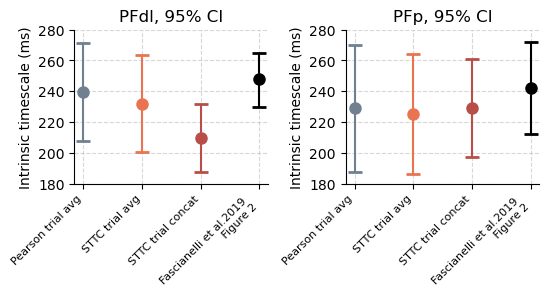

In [60]:
pfdl_conditions = [key for key in population_level_dict_2d.keys() if 'pfdl' in key and 'global' not in key]
pfp_conditions = [key for key in population_level_dict_2d.keys() if 'pfp' in key and 'global' not in key]

pfdl_tau = [population_level_dict_2d[c]['tau_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[0]]
pfdl_tau_lower = [population_level_dict_2d[c]['tau_lower_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[1]]
pfdl_tau_upper = [population_level_dict_2d[c]['tau_upper_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[2]]
pfdl_error_bars = [np.array(pfdl_tau) - np.array(pfdl_tau_lower), np.array(pfdl_tau_upper) - np.array(pfdl_tau)]

pfp_tau = [population_level_dict_2d[c]['tau_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[0]]
pfp_tau_lower = [population_level_dict_2d[c]['tau_lower_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[1]]
pfp_tau_upper = [population_level_dict_2d[c]['tau_upper_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[2]]
pfp_error_bars = [np.array(pfp_tau) - np.array(pfp_tau_lower), np.array(pfp_tau_upper) - np.array(pfp_tau)]

pfdl_conditions = pfdl_conditions + ['paper_f2']
pfp_conditions = pfp_conditions + ['paper_f2']

fig, axes = plt.subplots(1, 2, figsize=(6, 2), sharey=False)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

colors = [color_pearson_trail_avg, color_sttc_trail_avg, color_sttc_trail_concat, 'k']

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfdl_conditions, pfdl_tau, pfdl_error_bars[0], pfdl_error_bars[1], colors)):
    axes[0].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[0].set_xticks(pfdl_conditions)
axes[0].set_title('PFdl, 95% CI')

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfp_conditions, pfp_tau, pfp_error_bars[0], pfp_error_bars[1], colors)):
    axes[1].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[1].set_xticks(pfp_conditions)
axes[1].set_title('PFp, 95% CI')

for ax in axes.flat:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel('Intrinsic timescale (ms)')
    ax.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat', 'Fascianelli et al.2019 \n Figure 2'], 
                       rotation=45, ha='right', fontsize=8)
    ax.set_ylim([180, 280])

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit.svg', bbox_inches='tight')

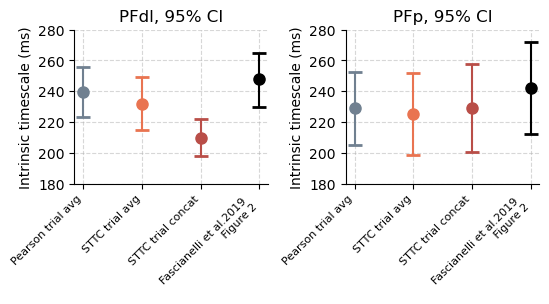

In [61]:
pfdl_conditions = [key for key in population_level_dict.keys() if 'pfdl' in key and 'global' not in key]
pfp_conditions = [key for key in population_level_dict.keys() if 'pfp' in key and 'global' not in key]

pfdl_tau = [population_level_dict[c]['tau_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[0]]
pfdl_tau_lower = [population_level_dict[c]['tau_lower_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[1]]
pfdl_tau_upper = [population_level_dict[c]['tau_upper_ms'] for c in pfdl_conditions] + [pfdl_tau_ci_paper_fig2[2]]
pfdl_error_bars = [np.array(pfdl_tau) - np.array(pfdl_tau_lower), np.array(pfdl_tau_upper) - np.array(pfdl_tau)]

pfp_tau = [population_level_dict[c]['tau_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[0]]
pfp_tau_lower = [population_level_dict[c]['tau_lower_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[1]]
pfp_tau_upper = [population_level_dict[c]['tau_upper_ms'] for c in pfp_conditions] + [pfp_tau_ci_paper_fig2[2]]
pfp_error_bars = [np.array(pfp_tau) - np.array(pfp_tau_lower), np.array(pfp_tau_upper) - np.array(pfp_tau)]

pfdl_conditions = pfdl_conditions + ['paper_f2']
pfp_conditions = pfp_conditions + ['paper_f2']

fig, axes = plt.subplots(1, 2, figsize=(6, 2), sharey=False)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

colors = [color_pearson_trail_avg, color_sttc_trail_avg, color_sttc_trail_concat, 'k']

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfdl_conditions, pfdl_tau, pfdl_error_bars[0], pfdl_error_bars[1], colors)):
    axes[0].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[0].set_xticks(pfdl_conditions)
axes[0].set_title('PFdl, 95% CI')

for i, (cond, tau, err_low, err_high, col) in enumerate(zip(pfp_conditions, pfp_tau, pfp_error_bars[0], pfp_error_bars[1], colors)):
    axes[1].errorbar(cond, tau, yerr=[[err_low], [err_high]], fmt='o', capsize=5, capthick=2, markersize=8, color=col)
axes[1].set_xticks(pfp_conditions)
axes[1].set_title('PFp, 95% CI')

for ax in axes.flat:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel('Intrinsic timescale (ms)')
    ax.set_xticklabels(['Pearson trial avg', 'STTC trial avg', 'STTC trial concat', 'Fascianelli et al.2019 \n Figure 2'], 
                       rotation=45, ha='right', fontsize=8)
    ax.set_ylim([180, 280])

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_mean_fit.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_mean_fit.svg', bbox_inches='tight')

#### ACF plots 

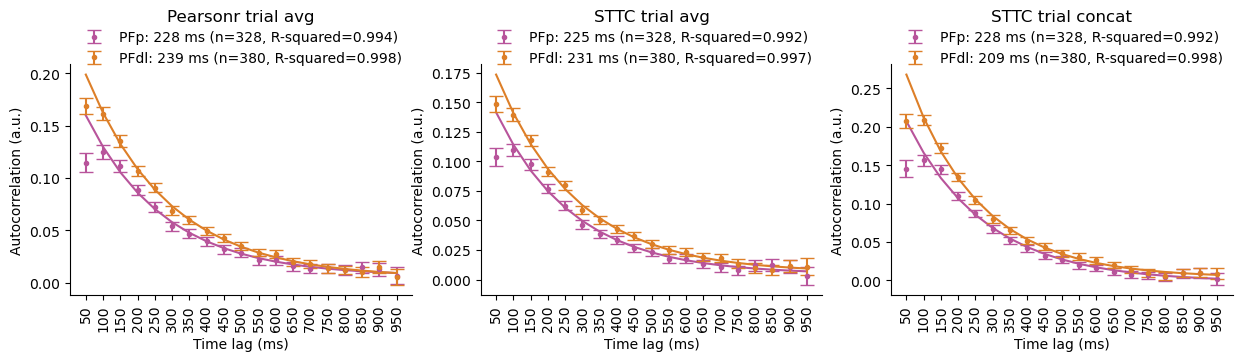

In [63]:
fig, axes = plt.subplots(1,3, figsize=(15,3), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# Pearsonr trial avg 
axes[0].set_title('Pearsonr trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict['pearsonr_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfp_acf_mean[1:], pfp_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfp']['popt']), color='#b8549b')

pfdl_label = f"PFdl: {int(population_level_dict['pearsonr_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfdl_acf_mean[1:], pfdl_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfdl']['popt']), color='#dd7f28')


# STTC trial avg 
axes[1].set_title('STTC trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict['sttc_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"

axes[1].errorbar(t, pfp_acf_sttc_mean[1:], pfp_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfp']['popt']), color='#b8549b')

pfdl_label = f"PFdl: {int(population_level_dict['sttc_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"

axes[1].errorbar(t, pfdl_acf_sttc_mean[1:], pfdl_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfdl']['popt']), color='#dd7f28')

# STTC trial concat 
axes[2].set_title('STTC trial concat', y=1.15)

pfp_label = f"PFp: {int(population_level_dict['sttc_trial_concat_pfp']['tau_ms'])} ms (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[2].errorbar(t, pfp_acf_sttc_concat_mean[1:], pfp_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfp']['popt']), color='#b8549b')

pfdl_label = f"PFdl: {int(population_level_dict['sttc_trial_concat_pfdl']['tau_ms'])} ms (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
axes[2].errorbar(t, pfdl_acf_sttc_concat_mean[1:], pfdl_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfdl']['popt']), color='#dd7f28')

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.2))

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.png', bbox_inches='tight')
    fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.svg', bbox_inches='tight')

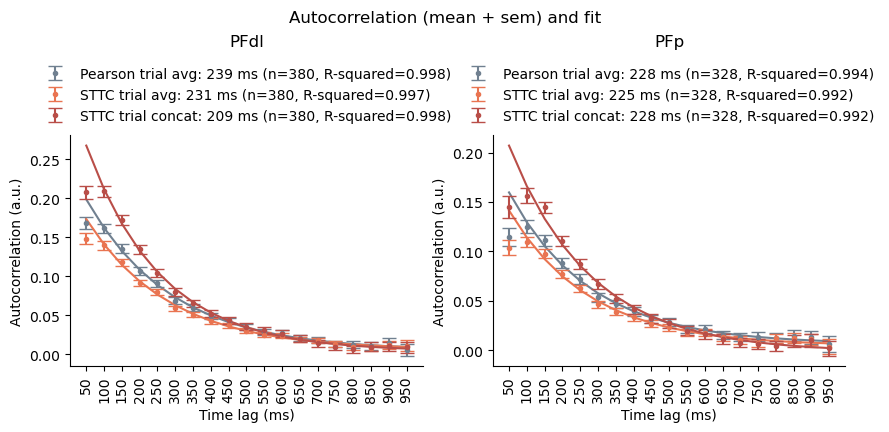

In [114]:
fig, axes = plt.subplots(1,2, figsize=(10,3), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# PFdl
# Pearsonr trial avg 
axes[0].set_title('PFdl', y=1.35)
pfdl_label = f"Pearson trial avg: {int(population_level_dict['pearsonr_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfdl_acf_mean[1:], pfdl_acf_sem[1:], linestyle='None', marker='.', capsize=5, color=color_pearson_trail_avg, label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfdl']['popt']), color=color_pearson_trail_avg)

pfdl_label = f"STTC trial avg: {int(population_level_dict['sttc_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfdl_acf_sttc_mean[1:], pfdl_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color=color_sttc_trail_avg, label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfdl']['popt']), color=color_sttc_trail_avg)

pfdl_label = f"STTC trial concat: {int(population_level_dict['sttc_trial_concat_pfdl']['tau_ms'])} ms (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfdl_acf_sttc_concat_mean[1:], pfdl_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, 
                 color=color_sttc_trail_concat, label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfdl']['popt']), color=color_sttc_trail_concat)

# PFp
axes[1].set_title('PFp', y=1.35)
pfp_label = f"Pearson trial avg: {int(population_level_dict['pearsonr_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1].errorbar(t, pfp_acf_mean[1:], pfp_acf_sem[1:], linestyle='None', marker='.', capsize=5, color=color_pearson_trail_avg, label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfp']['popt']), color=color_pearson_trail_avg)

# STTC trial avg 
pfp_label = f"STTC trial avg: {int(population_level_dict['sttc_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1].errorbar(t, pfp_acf_sttc_mean[1:], pfp_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color=color_sttc_trail_avg, label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfp']['popt']), color=color_sttc_trail_avg)

# STTC trial concat 
pfp_label = f"STTC trial concat: {int(population_level_dict['sttc_trial_concat_pfp']['tau_ms'])} ms (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[1].errorbar(t, pfp_acf_sttc_concat_mean[1:], pfp_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, 
                 color=color_sttc_trail_concat, label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfp']['popt']), color=color_sttc_trail_concat)

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.35))

fig.suptitle('Autocorrelation (mean + sem) and fit', y=1.3)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_mean_fit_acf.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_mean_fit_acf.svg', bbox_inches='tight')

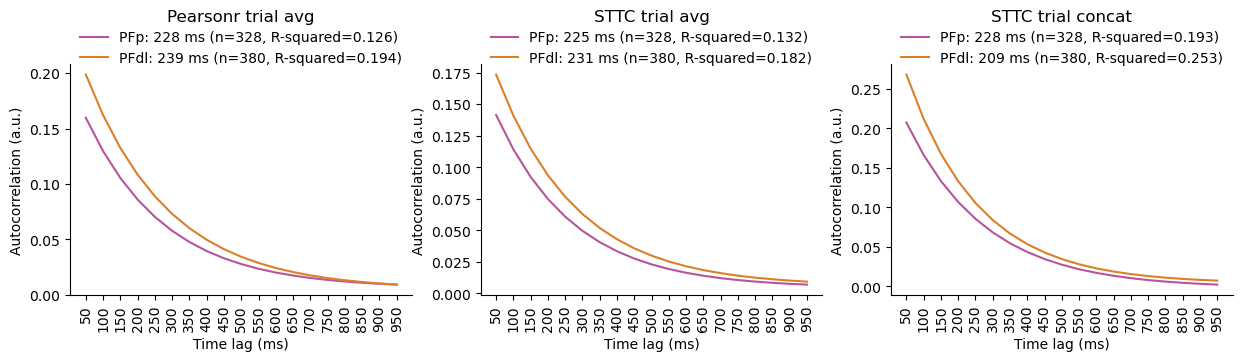

In [65]:
# fit using all ACFs - plot individual ACFs overlayed by fit

fig, axes = plt.subplots(1,3, figsize=(15,3), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# Pearsonr trial avg 
axes[0].set_title('Pearsonr trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
# axes[0].errorbar(t, pfp_acf_mean[1:], pfp_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfp']['popt']), color='#b8549b', label=pfp_label)

pfdl_label = f"PFdl: {int(population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
# axes[0].errorbar(t, pfdl_acf_mean[1:], pfdl_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfdl']['popt']), color='#dd7f28', label=pfdl_label)


# STTC trial avg 
axes[1].set_title('STTC trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict_2d['sttc_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"
# axes[1].errorbar(t, pfp_acf_sttc_mean[1:], pfp_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfp']['popt']), color='#b8549b', label=pfp_label)

pfdl_label = f"PFdl: {int(population_level_dict_2d['sttc_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"
# axes[1].errorbar(t, pfdl_acf_sttc_mean[1:], pfdl_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfdl']['popt']), color='#dd7f28', label=pfdl_label)

# STTC trial concat 
axes[2].set_title('STTC trial concat', y=1.15)

pfp_label = f"PFp: {int(population_level_dict_2d['sttc_trial_concat_pfp']['tau_ms'])} ms (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfp']['popt']), color='#b8549b', label=pfp_label)

pfdl_label = f"PFdl: {int(population_level_dict_2d['sttc_trial_concat_pfdl']['tau_ms'])} ms (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
# axes[2].errorbar(t, pfdl_acf_sttc_concat_mean[1:], pfdl_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfdl']['popt']), color='#dd7f28', label=pfdl_label)

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.2))

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.png', bbox_inches='tight')
    fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.svg', bbox_inches='tight')

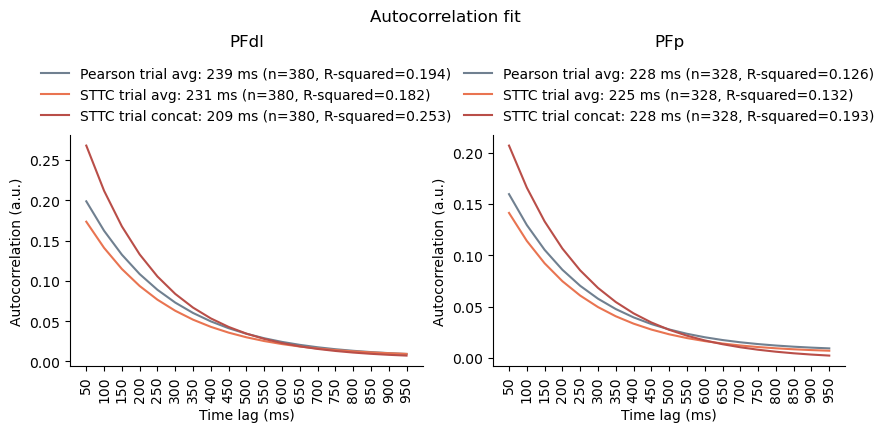

In [115]:
color_pearson_trail_avg = 'slategray' 
color_sttc_trail_avg =  '#E97451' #'chocolate' #'#D6A27A' # 'steelblue'
color_sttc_trail_concat = '#B94E48' # '#9E5345' #'sandybrown'

fig, axes = plt.subplots(1,2, figsize=(10,3), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# PFdl
# Pearsonr trial avg 
axes[0].set_title('PFdl', y=1.35)
pfdl_label = f"Pearson trial avg: {int(population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfdl']['popt']), color=color_pearson_trail_avg, label=pfdl_label)

pfdl_label = f"STTC trial avg: {int(population_level_dict_2d['sttc_trial_avg_pfdl']['tau_ms'])} ms (n={len(
pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfdl']['popt']), color=color_sttc_trail_avg, label=pfdl_label)

pfdl_label = f"STTC trial concat: {int(population_level_dict_2d['sttc_trial_concat_pfdl']['tau_ms'])} ms (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfdl']['popt']), color=color_sttc_trail_concat, label=pfdl_label)

# PFp
axes[1].set_title('PFp', y=1.35)
pfp_label = f"Pearson trial avg: {int(population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfp']['popt']), color=color_pearson_trail_avg, label=pfp_label)

# STTC trial avg 
pfp_label = f"STTC trial avg: {int(population_level_dict_2d['sttc_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfp']['popt']), color=color_sttc_trail_avg, label=pfp_label)

# STTC trial concat 
pfp_label = f"STTC trial concat: {int(population_level_dict_2d['sttc_trial_concat_pfp']['tau_ms'])} ms (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfp']['popt']), color=color_sttc_trail_concat, label=pfp_label)

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.35))

sns.despine()

fig.suptitle('Autocorrelation fit', y=1.3)

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit_acf.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit_acf.svg', bbox_inches='tight')

In [100]:
population_level_dict_2d

{'pearsonr_trial_avg_pfdl': {'tau_ms': 239.4435640825352,
  'tau_lower_ms': 207.63875571251927,
  'tau_upper_ms': 271.2483724525511,
  'fit_r_squared': 0.19352188849660656,
  'popt': array([0.23897155, 0.20881747, 0.01975393])},
 'pearsonr_trial_avg_pfp': {'tau_ms': 228.90957206482358,
  'tau_lower_ms': 187.5803467735988,
  'tau_upper_ms': 270.2387973560484,
  'fit_r_squared': 0.12553168556319916,
  'popt': array([0.19090997, 0.21842686, 0.03274047])},
 'sttc_trial_avg_pfdl': {'tau_ms': 231.80731275419254,
  'tau_lower_ms': 200.36795534280105,
  'tau_upper_ms': 263.2466701655841,
  'fit_r_squared': 0.181978417230092,
  'popt': array([0.20779474, 0.21569639, 0.02837646])},
 'sttc_trial_avg_pfp': {'tau_ms': 225.10813009505227,
  'tau_lower_ms': 185.89186870227073,
  'tau_upper_ms': 264.32439148783385,
  'fit_r_squared': 0.13174902402122868,
  'popt': array([0.1709865 , 0.22211548, 0.02609411])},
 'sttc_trial_concat_pfdl': {'tau_ms': 209.64089831335951,
  'tau_lower_ms': 187.6742150082134

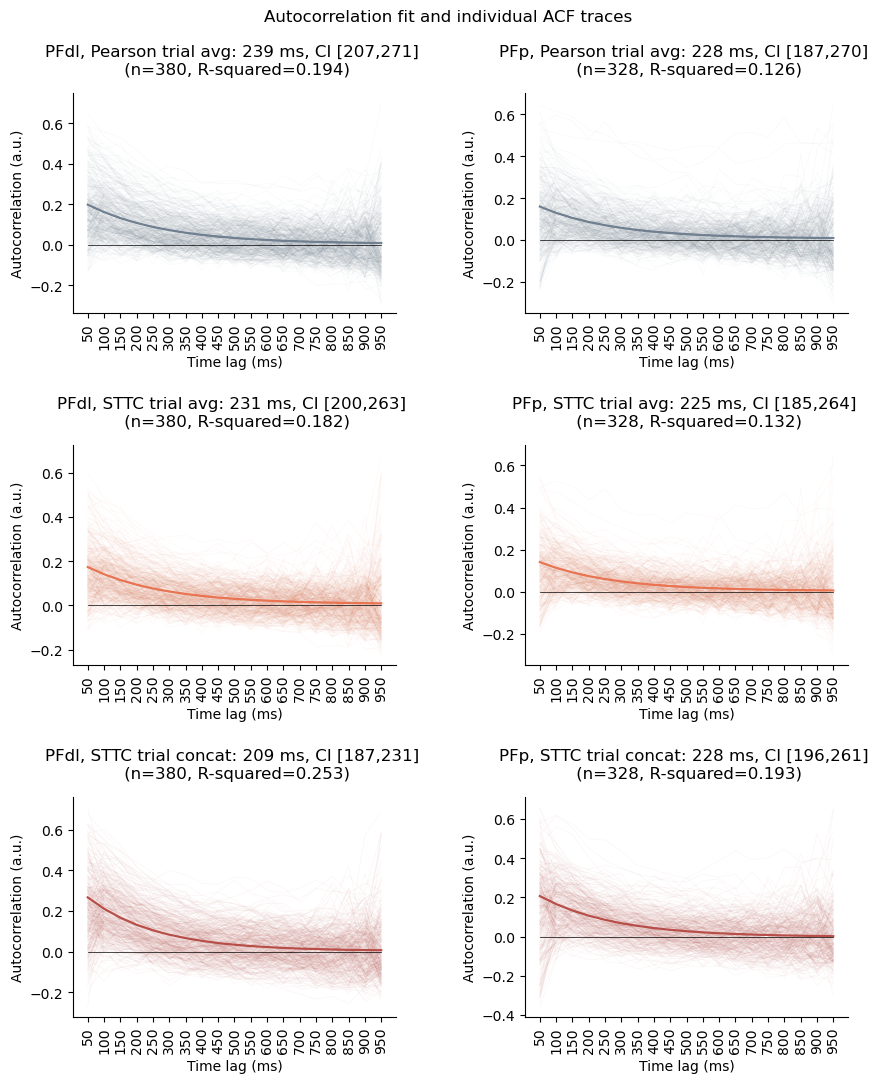

In [118]:
fig, axes = plt.subplots(3,2, figsize=(10,12), sharey=False)
plt.subplots_adjust(hspace=0.6, wspace=0.4)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# PFdl
# Pearsonr trial avg 
pfdl_label = f"Pearson trial avg: {int(population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_lower_ms'])},{int(
    population_level_dict_2d['pearsonr_trial_avg_pfdl']['tau_upper_ms'])}] \n (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0,0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfdl']['popt']), color=color_pearson_trail_avg, label=pfdl_label)
for ii in range(pfdl_acf_2d.shape[0]):
    axes[0,0].plot(t, pfdl_acf_2d[ii, 1:], lw=0.5, color=color_pearson_trail_avg, alpha=0.05)
axes[0,0].set_title('PFdl, ' + pfdl_label, y=1.05)

pfdl_label = f"STTC trial avg: {int(population_level_dict_2d['sttc_trial_avg_pfdl']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['sttc_trial_avg_pfdl']['tau_lower_ms'])},{int(
    population_level_dict_2d['sttc_trial_avg_pfdl']['tau_upper_ms'])}] \n (n={len(
pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[1,0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfdl']['popt']), color=color_sttc_trail_avg, label=pfdl_label)
for ii in range(pfdl_acf_sttc_2d.shape[0]):
    axes[1,0].plot(t, pfdl_acf_sttc_2d[ii, 1:], lw=0.5, color=color_sttc_trail_avg, alpha=0.05)
axes[1,0].set_title('PFdl, ' + pfdl_label, y=1.05)

pfdl_label = f"STTC trial concat: {int(population_level_dict_2d['sttc_trial_concat_pfdl']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['sttc_trial_concat_pfdl']['tau_lower_ms'])},{int(
    population_level_dict_2d['sttc_trial_concat_pfdl']['tau_upper_ms'])}] \n (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
axes[2,0].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfdl']['popt']), color=color_sttc_trail_concat, label=pfdl_label)
for ii in range(pfdl_acf_sttc_concat_2d.shape[0]):
    axes[2,0].plot(t, pfdl_acf_sttc_concat_2d[ii, 1:], lw=0.5, color=color_sttc_trail_concat, alpha=0.05)
axes[2,0].set_title('PFdl, ' + pfdl_label, y=1.05)

# PFp
axes[0,1].set_title('PFp', y=1.05)
pfp_label = f"Pearson trial avg: {int(population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_lower_ms'])},{int(
    population_level_dict_2d['pearsonr_trial_avg_pfp']['tau_upper_ms'])}] \n (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict_2d['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[0,1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['pearsonr_trial_avg_pfp']['popt']), color=color_pearson_trail_avg, label=pfp_label)
for ii in range(pfp_acf_2d.shape[0]):
    axes[0,1].plot(t, pfp_acf_2d[ii, 1:], lw=0.5, color=color_pearson_trail_avg, alpha=0.05)
axes[0,1].set_title('PFp, ' + pfp_label, y=1.05)

# STTC trial avg 
pfp_label = f"STTC trial avg: {int(population_level_dict_2d['sttc_trial_avg_pfp']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['sttc_trial_avg_pfp']['tau_lower_ms'])},{int(
    population_level_dict_2d['sttc_trial_avg_pfp']['tau_upper_ms'])}] \n (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[1,1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_avg_pfp']['popt']), color=color_sttc_trail_avg, label=pfp_label)
for ii in range(pfp_acf_sttc_2d.shape[0]):
    axes[1,1].plot(t, pfp_acf_sttc_2d[ii, 1:], lw=0.5, color=color_sttc_trail_avg, alpha=0.05)
axes[1,1].set_title('PFp, ' + pfp_label, y=1.05)

# STTC trial concat 
pfp_label = f"STTC trial concat: {int(population_level_dict_2d['sttc_trial_concat_pfp']['tau_ms'])} ms, CI [{int(
    population_level_dict_2d['sttc_trial_concat_pfp']['tau_lower_ms'])},{int(
    population_level_dict_2d['sttc_trial_concat_pfp']['tau_upper_ms'])}] \n (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict_2d['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[2,1].plot(t, func_single_exp_monkey(t, *population_level_dict_2d['sttc_trial_concat_pfp']['popt']), color=color_sttc_trail_concat, label=pfp_label)
for ii in range(pfp_acf_sttc_concat_2d.shape[0]):
    axes[2,1].plot(t, pfp_acf_sttc_concat_2d[ii, 1:], lw=0.5, color=color_sttc_trail_concat, alpha=0.05)
axes[2,1].set_title('PFp, ' + pfp_label, y=1.05)

for ax in axes.flat:
    ax.plot(t, np.zeros(len(t)), lw=0.5, c='k')
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    #ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.15))

sns.despine()

fig.suptitle('Autocorrelation fit and individual ACF traces', y=0.95)

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit_acf_ind_traces.png', bbox_inches='tight', dpi=300)
    fig.savefig(fig_folder + 'fig2_repr_no_empty_1000ms_population_fit_acf_ind_traces.svg', bbox_inches='tight')